#                                   **Credit Card Fraud Prediction**

**TEAM MEMBERS:**

SRUTHI BASINENI ,1RVU22BSC013

JYOSTHNA CHIDARAPADU,USN:1RVU22BSC021

NISHITA BANKAPUR, USN: 1RVU22BSC063

RAKSHITHA M, USN: 1RVU22BSC079







**PROBLEM STATEMENT:** Identifying fraudulent credit card transactions
accurately, to minimize financial losses for card companies and users.

The dataset is obtained from kaggele which provides a comprehensive collection of transactional data.

It consists of 8000 rows and 17 columns in which 16 columns are independent variables and 1 column is the dependent variable i.e, "Fraud Flag or Label"

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


### **1. PREPROCESSING**

In [84]:
df1 = pd.read_csv('/content/fraud.csv.csv')

In [85]:
df1

,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information
0,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,29-Apr,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet
1,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,26-Mar,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile
2,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,29-Nov,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile
3,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,25-Sep,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet
4,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,31-Mar,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2214.15,Lakshay Khatri,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,Manda Ltd,1236,Anantapuram,EUR,Visa,26-Apr,d4b9aead1dd10a596542d1d8211a5021b9c3e894751d01...,5,0d219c55-87cf-43af-a1bb-cda408710de1,0,1,Online,214.34.176.247,Mobile
7996,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,Visa,25-Nov,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,In-Person,34.237.199.33,Tablet
7997,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,24-May,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,In-Person,220.203.140.160,Tablet
7998,3035.31,Chirag Rege,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,24-Sep,e7866fdc6672f827c76f6124ca3eeaff44aff8b7caf4ee...,0,2424f724-8bd2-4dd0-8b39-e824999a9764,1,1,In-Person,216.56.133.227,Tablet


In [86]:
df1.shape

(8000, 17)

In [87]:
# lets check the missing values
df1.isna().sum()

Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
dtype: int64

In [88]:
(df1.isnull().sum() / len(df1)) * 100

Transaction Amount                         0.0
Cardholder Name                            0.0
Card Number (Hashed or Encrypted)          0.0
Merchant Name                              0.0
Merchant Category Code (MCC)               0.0
Transaction Location (City or ZIP Code)    0.0
Transaction Currency                       0.0
Card Type                                  0.0
Card Expiration Date                       0.0
CVV Code (Hashed or Encrypted)             0.0
Transaction Response Code                  0.0
Transaction ID                             0.0
Fraud Flag or Label                        0.0
Previous Transactions                      0.0
Transaction Source                         0.0
IP Address                                 0.0
Device Information                         0.0
dtype: float64

**Label encoding** is often used to convert these categorical variables into numerical format. This conversion is necessary because many machine learning algorithms require numerical input for training.So,the model can effectively train to detect patterns and make predictions based on these features.

In [89]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Cardholder Name', 'Merchant Name', 'Transaction Location (City or ZIP Code)', 'Card Type', 'Transaction Source', 'Device Information']
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df1[col] = label_encoder.fit_transform(df1[col])
print(df1.head())


   Transaction Amount  Cardholder Name  \
0              285.88             6398   
1             1777.32             3729   
2             3939.01             5542   
3              376.44             4272   
4             1687.33             4066   

                   Card Number (Hashed or Encrypted)  Merchant Name  \
0  daca51bffe0fc4eaaa7c430917f94b75fd893712492254...           4585   
1  d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...           6117   
2  4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...            249   
3  4721806eed8f2663bb597ff13e79a294de318358fbb54b...           3820   
4  9deacc3a9efd6e382826d400620aca5f23ed94327578e5...           2364   

   Merchant Category Code (MCC)  Transaction Location (City or ZIP Code)  \
0                          3590                                      153   
1                          7277                                      309   
2                          9297                                      208   
3               

In [90]:
df1

,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information
0,285.88,6398,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,4585,3590,153,INR,1,29-Apr,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,1,18.106.240.6,2
1,1777.32,3729,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,6117,7277,309,EUR,0,26-Mar,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,1,212.48.185.128,1
2,3939.01,5542,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,249,9297,208,USD,2,29-Nov,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,0,17.190.112.46,1
3,376.44,4272,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,3820,5686,244,USD,2,25-Sep,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,0,153.136.24.104,2
4,1687.33,4066,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,2364,2940,0,INR,1,31-Mar,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,1,196.153.28.131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2214.15,3712,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,4374,1236,21,EUR,2,26-Apr,d4b9aead1dd10a596542d1d8211a5021b9c3e894751d01...,5,0d219c55-87cf-43af-a1bb-cda408710de1,0,1,1,214.34.176.247,1
7996,675.97,1616,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,1069,3406,107,INR,2,25-Nov,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,0,34.237.199.33,2
7997,918.28,489,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,2838,7504,302,USD,1,24-May,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,0,220.203.140.160,2
7998,3035.31,1401,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,3294,4015,281,EUR,0,24-Sep,e7866fdc6672f827c76f6124ca3eeaff44aff8b7caf4ee...,0,2424f724-8bd2-4dd0-8b39-e824999a9764,1,1,0,216.56.133.227,2


In [91]:
# Calculate correlation coefficients between numeric features and label
correlation_matrix = df1.corr()
correlation_with_label = correlation_matrix['Fraud Flag or Label'].sort_values(ascending=False)
print("Correlation with Label (Fraud Flag or Label):")
print(correlation_with_label)


Correlation with Label (Fraud Flag or Label):
Fraud Flag or Label                        1.000000
Card Type                                  0.015454
Transaction Source                         0.013178
Merchant Category Code (MCC)               0.012742
Transaction Response Code                  0.010705
Device Information                        -0.000033
Merchant Name                             -0.001154
Transaction Location (City or ZIP Code)   -0.004087
Transaction Amount                        -0.009679
Cardholder Name                           -0.014884
Name: Fraud Flag or Label, dtype: float64


<ipython-input-91-308d11cb0e7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


<ipython-input-92-73d0e73968c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


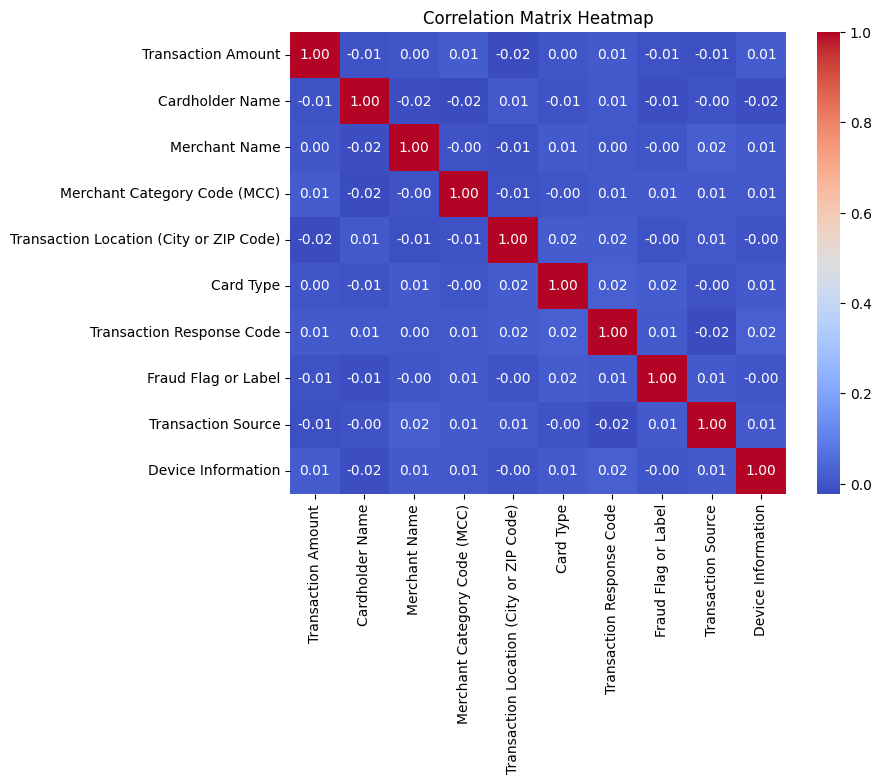

In [92]:
# Calculate correlation matrix
correlation_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [93]:
# List of columns to consider as features
features = [
    'Card Type',
    'Transaction Source',
    'Merchant Category Code (MCC)',
    'Transaction Response Code',
    'Transaction Amount',
    'Cardholder Name'
]

print("Selected features:", features)

Selected features: ['Card Type', 'Transaction Source', 'Merchant Category Code (MCC)', 'Transaction Response Code', 'Transaction Amount', 'Cardholder Name']


## 2. **ANALYSIS**

In [94]:
df1['Fraud Flag or Label'].unique()

array([1, 0])

 Here,1 define that fraud activity occurred.

 0 define no such activity occurred.

In [95]:
Fraud = df1['Fraud Flag or Label'][df1['Fraud Flag or Label']==1].count()
Fraud

3989

In [96]:
Non_Fraud = df1['Fraud Flag or Label'][df1['Fraud Flag or Label']==0].count()
Non_Fraud

4011

In [111]:
total=Fraud+Non_Fraud
total

8000

In [97]:
print(f"Total Fraud proportion is {Fraud*100/(total)} %")
print  (f" and Total Non Fraud proportion is {Non_Fraud*100/(total)} %")

Total Fraud proportion is 49.8625 %
 and Total Non Fraud proportion is 50.1375 %


## 3.Splitting

In [98]:
# Extract features and target variable
X = df1[features]
y = df1['Fraud Flag or Label']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.Model Selection

In [101]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=15)

In [102]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [103]:
# Predict on the test set
y_pred = knn.predict(X_test)

## 5.Testing

In [104]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [105]:
y_test

2215    0
2582    1
1662    0
3027    0
4343    0
       ..
1079    1
7979    0
1115    1
6093    1
6832    0
Name: Fraud Flag or Label, Length: 1600, dtype: int64

## 6.EVALUATION METRICS

1.CLASSIFICATION ACCURACY


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.491875


2.CONFUSION MATRIX

The confusion matrix is a summary of prediction results on a classification problem.

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[414 379]
 [434 373]]


## Different predictions made by model
True Positives - Correctly identified fraudulent transactions

FalsePositives - incorrectly flagged non-fraudulent transactions as fraudulent

True Negatives - correctly identified non-fraudulent transactions

False Negatives - failed to identify fraudulent transactions


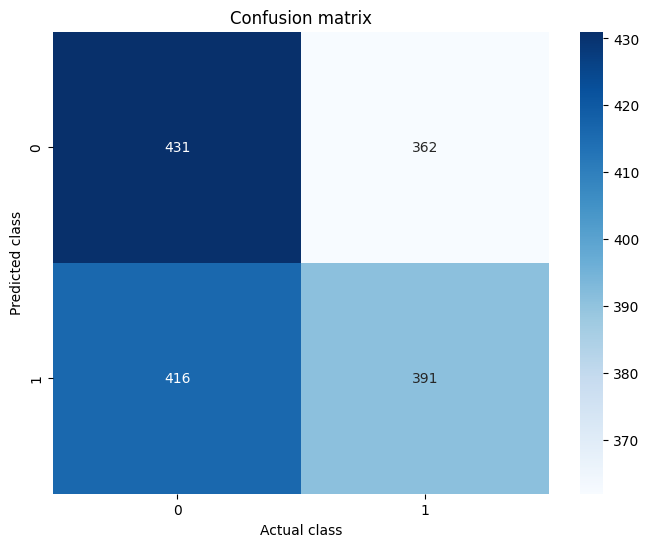

In [108]:
conf_matrix_values = [[431, 362],
                      [416, 391]]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_values, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion matrix")
plt.xlabel('Actual class')
plt.ylabel('Predicted class')
plt.show()

### 3.CLASSIFICATION REPORT
*   Accuracy

*   Precision

*   Recall

*   F1-Score

In [109]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.491875
Precision: 0.49601063829787234
Recall: 0.46220570012391576
F1-score: 0.47851186658114175


## Cross-Validation


**Cross-Validation** is a technique used to assess how well ML models
perform on unseen data

In [110]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  #number of neighbors

num_folds = 5  # folds

stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(knn, X, y, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())




Cross-Validation Scores: [0.479375 0.495    0.49     0.495625 0.50125 ]
Mean Accuracy: 0.49224999999999997
Standard Deviation of Accuracy: 0.007359093014767506



*  **Cross-Validation Scores: [0.479375, 0.495, 0.49, 0.495625, 0.50125]**
   
   These are the accuracy scores for each fold. Each score represents the accuracy achieved on the validation set for a particular fold.
*   **Mean Accuracy: 0.49225**
   
   These are the accuracy scores for each fold. Each score represents the accuracy achieved on the validation set for a particular fold.

*   **Mean Accuracy: 0.49225**
   
   This is the average accuracy across all folds,represents the overall performance of the model.

*   **Standard Deviation of Accuracy: 0.007359093014767506**
   
   It value indicates the variability or spread of the accuracy scores. It provides insight into the consistency of the model's performance.



## CONCLUSION

Through comprehensive preprocessing steps, including label encoding for
categorical variables, ensured that the data was suitable for training the model effectively.For training the model, KNN algorithm is used.The accuracy is 49.18% which is low because of data quality,feature relevance,imbalanced classes and model complexity.With an accuracy of 49.18%, there is chance for improvement through feature engineering, model selection, and data preprocessing. These steps can refine the model's performance and potentially increase its accuracy in detecting fraudulent credit card transactions.